<a href="https://colab.research.google.com/github/jiiiisoo/baekjoon/blob/master/gradient%20descent%20algorithm_1D%20line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도학습 : 회귀**
**1. 1차원 직선 모델**

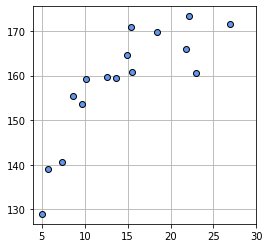

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 몸무게의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

# 데이터 그래프
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()


데이터에 따라 직선이 그려지면 새로운 나이 데이터의 키를 예측할 수 있다.
직선의 방정식을 y=w_0x+w_1 이라고 한다면, x_n에서의 오차 제곱은 (y_n-t_n)^2 이고, 모든 데이터 점의 제곱 오차의 평균은 J로 나타낼 수 있다.

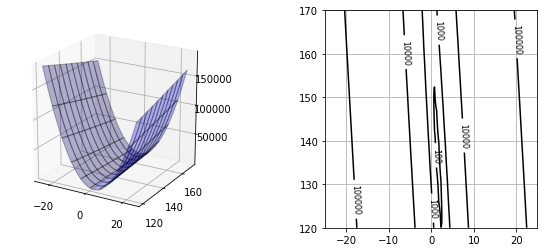

In [13]:
from mpl_toolkits.mplot3d import Axes3D

#평균 오차 함수
def J_func(x,t,w):
  y=w[0]*x+w[1]
  J_mean=np.mean((y-t)**2)
  return J_mean

#계산
xn=100 #등고선 표시 해상도
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1,i0]=J_func(X,T,(x0[i0],x1[i1]))

#표시
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10, cstride=10, alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
con=plt.contour(xx0,xx1,J,30,colors='black',levels=[100, 1000, 10000, 100000])
con.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()